## `np.sort` and `np.argsort`

In [1]:
import numpy as np

In [2]:
x = np.array([2, 1, 4, 3, 5])

In [3]:
np.sort(x) # return a sorted version of the array without modifying the input

array([1, 2, 3, 4, 5])

In [4]:
x

array([2, 1, 4, 3, 5])

In [7]:
x.sort() # sort the array in-place
x

array([1, 2, 3, 4, 5])

`argsort`: returns the *indices* of the sorted elements 

In [8]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [9]:
x[i]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

In [10]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [11]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [12]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

Find the *k* smallest values in the array.

`np.partition`: takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order

In [13]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
x 

array([7, 2, 3, 1, 6, 5, 4])

In [14]:
np.partition(x, 3) # the first three values in the resulting array are the three smallest in the array

array([2, 1, 3, 4, 6, 5, 7])

In [15]:
np.partition(x, 4)

array([2, 1, 3, 4, 5, 6, 7])

In [16]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [17]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example: k-Nearest Neighbors

### Create a random set of 10 piints on a two-dimensional plane

In [72]:
X = rand.randint(10, size=(5, 2))
X

array([[2, 0],
       [2, 4],
       [2, 0],
       [4, 9],
       [6, 6]])

In [73]:
X.shape

(5, 2)

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

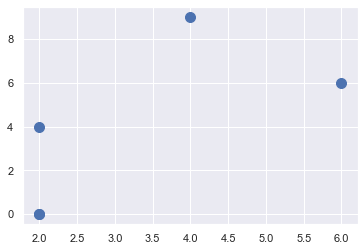

In [75]:
plt.scatter(X[:, 0], X[:, 1], s=100)

### Compute the squared distance between each pair of points

In [76]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

Break the code above down into its component steps:

In [77]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(5, 5, 2)

In [78]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(5, 5, 2)

In [79]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(5, 5)

In [80]:
# double check: whether the diagonal of this matrix is all zero
dist_sq.diagonal()

array([0, 0, 0, 0, 0])

In [81]:
dist_sq

array([[ 0, 16,  0, 85, 52],
       [16,  0, 16, 29, 20],
       [ 0, 16,  0, 85, 52],
       [85, 29, 85,  0, 13],
       [52, 20, 52, 13,  0]])

### Use `np.argsort` to sort along each row

The leftmost columns will then give the indices of the nearest neighbors

In [82]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 2, 1, 4, 3],
       [1, 0, 2, 4, 3],
       [0, 2, 1, 4, 3],
       [3, 4, 1, 0, 2],
       [4, 3, 1, 0, 2]])

The first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself.

If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k+1$ squared distances come first, with larger distances filling the remaining positions of the array.

In [83]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[2, 0, 1, 4, 3],
       [1, 2, 0, 4, 3],
       [2, 0, 1, 4, 3],
       [3, 4, 1, 0, 2],
       [3, 4, 1, 0, 2]])

### Visualization

Plot the points along with lines representing the connections from each point to its two nearest neighbors

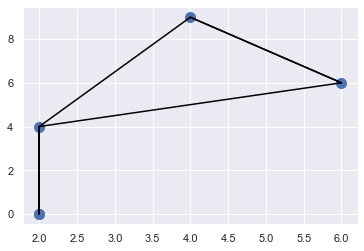

In [84]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use zip magic 
        plt.plot(*zip(X[j], X[i]), color="black")